In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Step-1: Read the data**

In [2]:
bank_additional=pd.read_csv(r"C:\Users\dasar\Documents\Data Science\Naresh IT\Data sets\bank-additional.csv", sep=";")
bank_additional.to_csv("bank_additional.csv")
bank_additional

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


**Data quick checks
        a) dtypes columns shape size  info**

In [3]:
print(f"The no of rows are {bank_additional.shape[0]}")
print(f"The no of columns are {bank_additional.shape[1]}")
print(f"The size of bank_additional is {bank_additional.size}")

The no of rows are 4119
The no of columns are 21
The size of bank_additional is 86499


$dtypes$

In [4]:
bank_additional.dtypes
# object means categorical
# int float means numerical

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

**Step-3: Convert categorical columns
        Numerical columns names separately**

In [5]:
bank_additional.select_dtypes(include='object') # For categorical data

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,no
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent,no
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent,no
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
4114,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,nonexistent,no
4115,admin.,married,high.school,no,yes,no,telephone,jul,fri,nonexistent,no
4116,student,single,high.school,no,no,no,cellular,may,mon,failure,no
4117,admin.,married,high.school,no,no,no,cellular,aug,fri,nonexistent,no


In [6]:
bank_additional.select_dtypes(exclude='object') # For numerical data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1


**Step-4: You need fill the missing values**

In [7]:
bank_additional.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4115,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4116,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4117,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
bank_additional.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
bank_additional.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [10]:
bank_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

**Step-5: Categorical data analysis**

$unique$

In [11]:
for column in bank_additional.select_dtypes(include='object'):
    print("Column name:",column,", Unique values:",bank_additional[column].unique())

Column name: job , Unique values: ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
Column name: marital , Unique values: ['married' 'single' 'divorced' 'unknown']
Column name: education , Unique values: ['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
Column name: default , Unique values: ['no' 'unknown' 'yes']
Column name: housing , Unique values: ['yes' 'no' 'unknown']
Column name: loan , Unique values: ['no' 'unknown' 'yes']
Column name: contact , Unique values: ['cellular' 'telephone']
Column name: month , Unique values: ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
Column name: day_of_week , Unique values: ['fri' 'wed' 'mon' 'thu' 'tue']
Column name: poutcome , Unique values: ['nonexistent' 'failure' 'success']
Column name: y , Unique values: ['no' 'yes']


$nunique$

In [12]:
for column in bank_additional.select_dtypes(include='object'):
    print("Column name:",column,", no of Unique values:",bank_additional[column].nunique())

Column name: job , no of Unique values: 12
Column name: marital , no of Unique values: 4
Column name: education , no of Unique values: 8
Column name: default , no of Unique values: 3
Column name: housing , no of Unique values: 3
Column name: loan , no of Unique values: 3
Column name: contact , no of Unique values: 2
Column name: month , no of Unique values: 10
Column name: day_of_week , no of Unique values: 5
Column name: poutcome , no of Unique values: 3
Column name: y , no of Unique values: 2


$value counts$

In [13]:
categorical_columns = bank_additional.select_dtypes(include='object').columns

value_counts_dataframes = {}  # Dictionary to store DataFrames for value counts of each categorical column

for column in categorical_columns:
    value_counts_dataframes[column] = bank_additional[column].value_counts().reset_index()
    value_counts_dataframes[column].columns = [column, 'count']
for column, df in value_counts_dataframes.items():
    print(f"Value counts for {column}:\n{df}\n")

Value counts for job:
              job  count
0          admin.   1012
1     blue-collar    884
2      technician    691
3        services    393
4      management    324
5         retired    166
6   self-employed    159
7    entrepreneur    148
8      unemployed    111
9       housemaid    110
10        student     82
11        unknown     39

Value counts for marital:
    marital  count
0   married   2509
1    single   1153
2  divorced    446
3   unknown     11

Value counts for education:
             education  count
0    university.degree   1264
1          high.school    921
2             basic.9y    574
3  professional.course    535
4             basic.4y    429
5             basic.6y    228
6              unknown    167
7           illiterate      1

Value counts for default:
   default  count
0       no   3315
1  unknown    803
2      yes      1

Value counts for housing:
   housing  count
0      yes   2175
1       no   1839
2  unknown    105

Value counts for loan:
      loan

$bar chart$

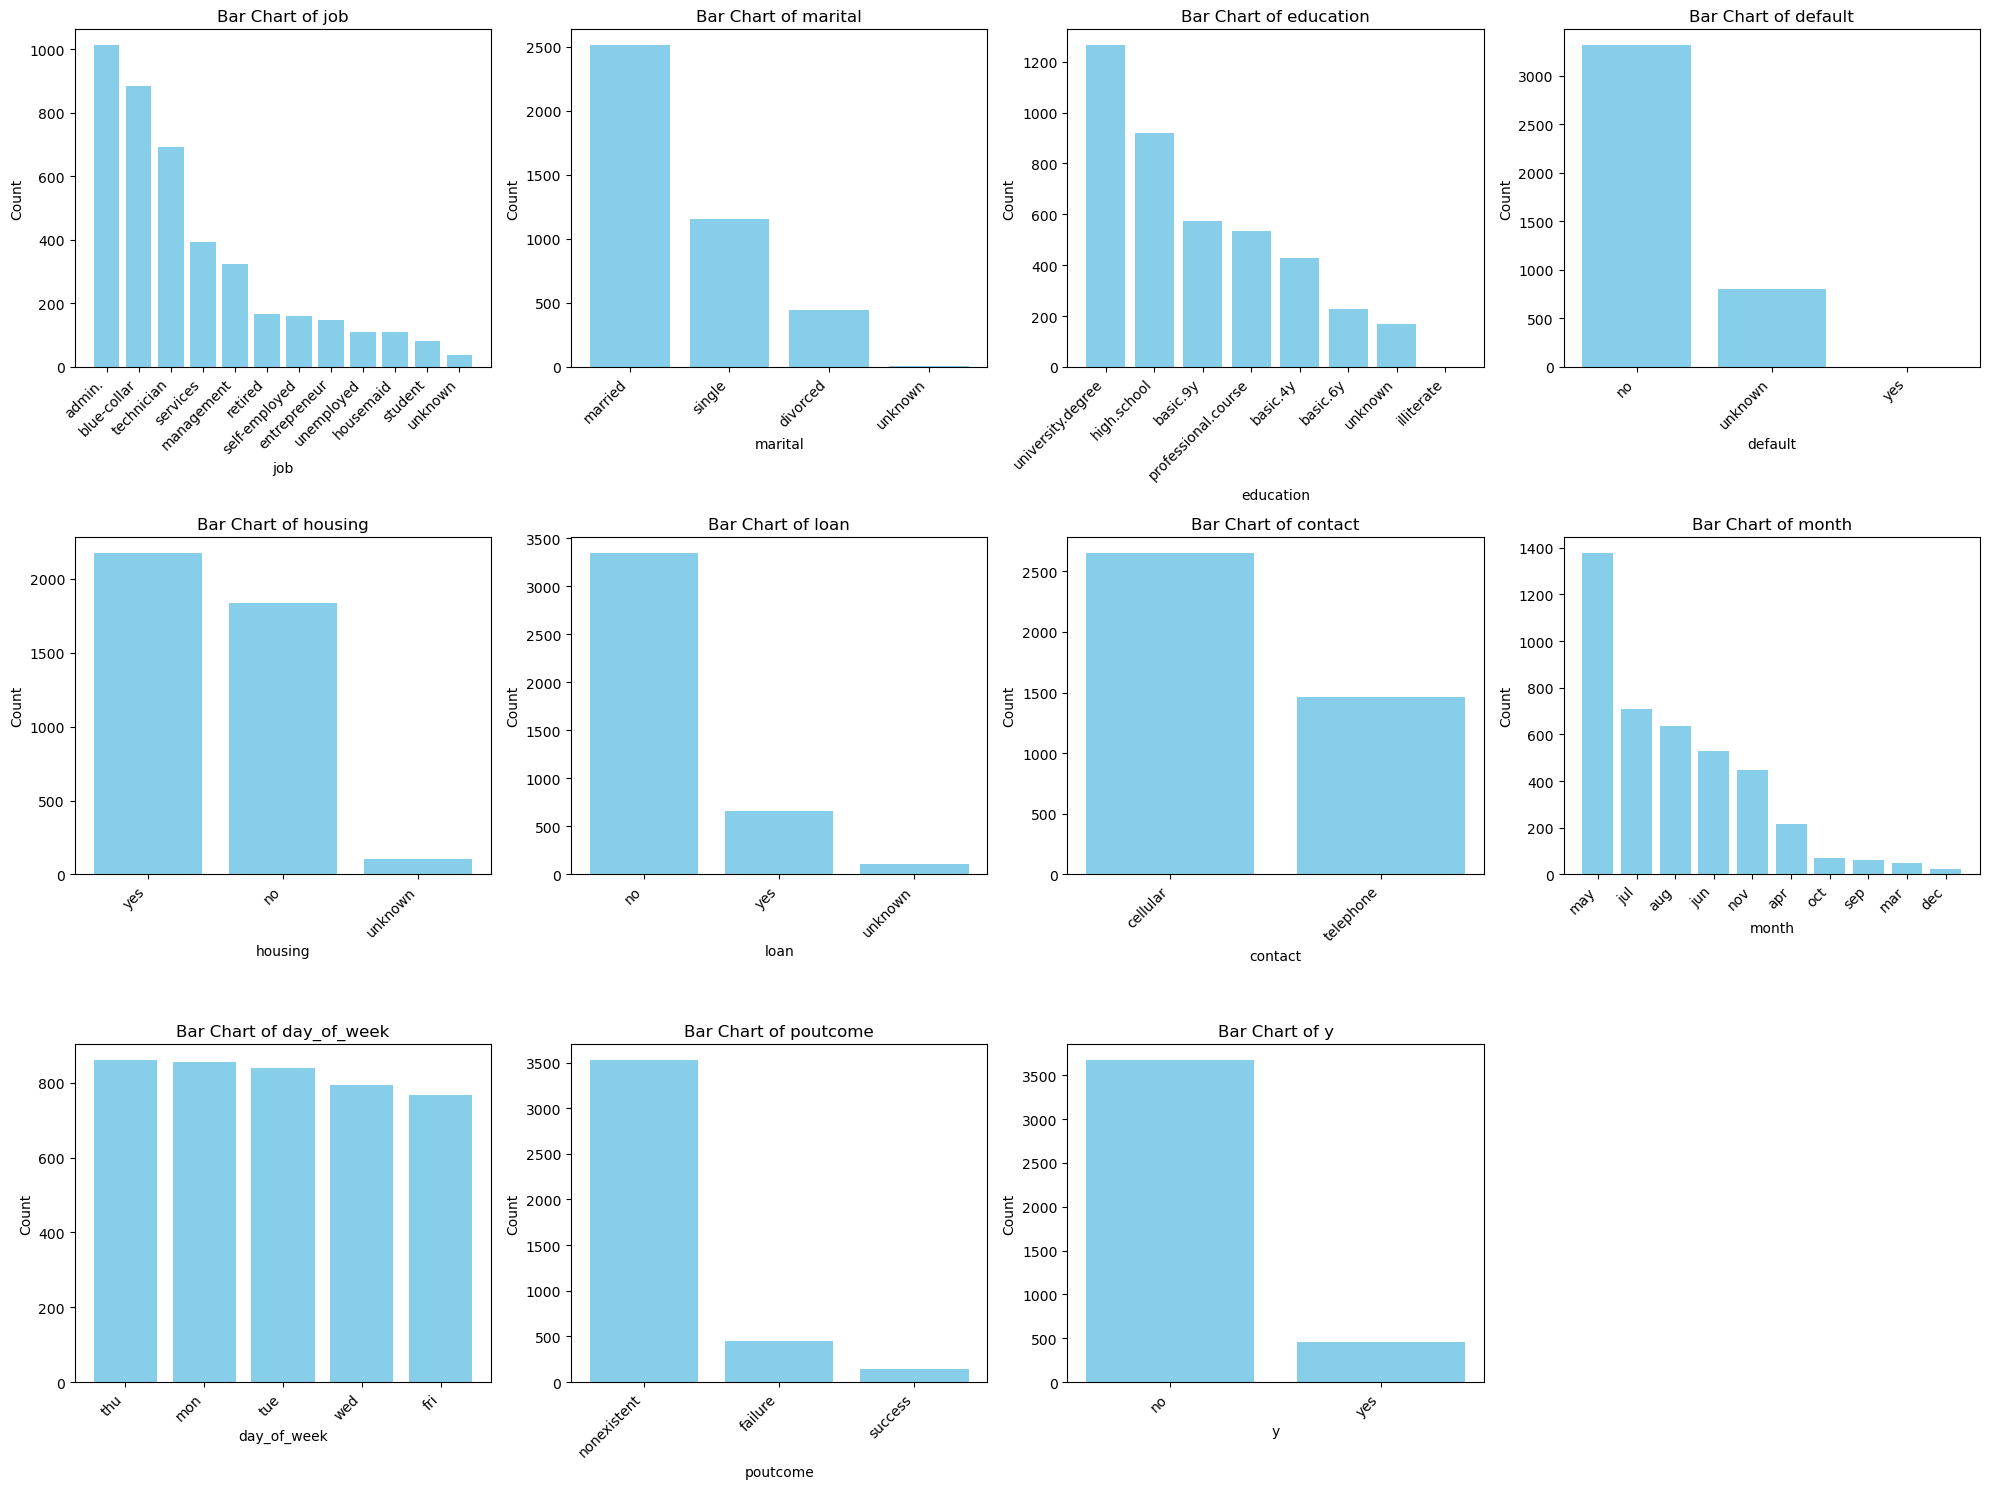

In [14]:
# Create subplots with 3 rows and 4 columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical column's value counts as a bar chart in a subplot
for ax, (column, df) in zip(axes, value_counts_dataframes.items()):
    ax.bar(df[column], df['count'], color='skyblue')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'Bar Chart of {column}')
    ax.set_xticks(range(len(df[column])))
    ax.set_xticklabels(df[column], rotation=45, ha='right')

# Hide any remaining empty subplots
for i in range(len(value_counts_dataframes), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

$Count Plot$

C:\Users\dasar\AppData\Local\Temp\ipykernel_18260\2878849154.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\dasar\AppData\Local\Temp\ipykernel_18260\2878849154.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\dasar\AppData\Local\Temp\ipykernel_18260\2878849154.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\dasar\AppData\Local\Temp\ipykernel_18260\2878849154.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xti

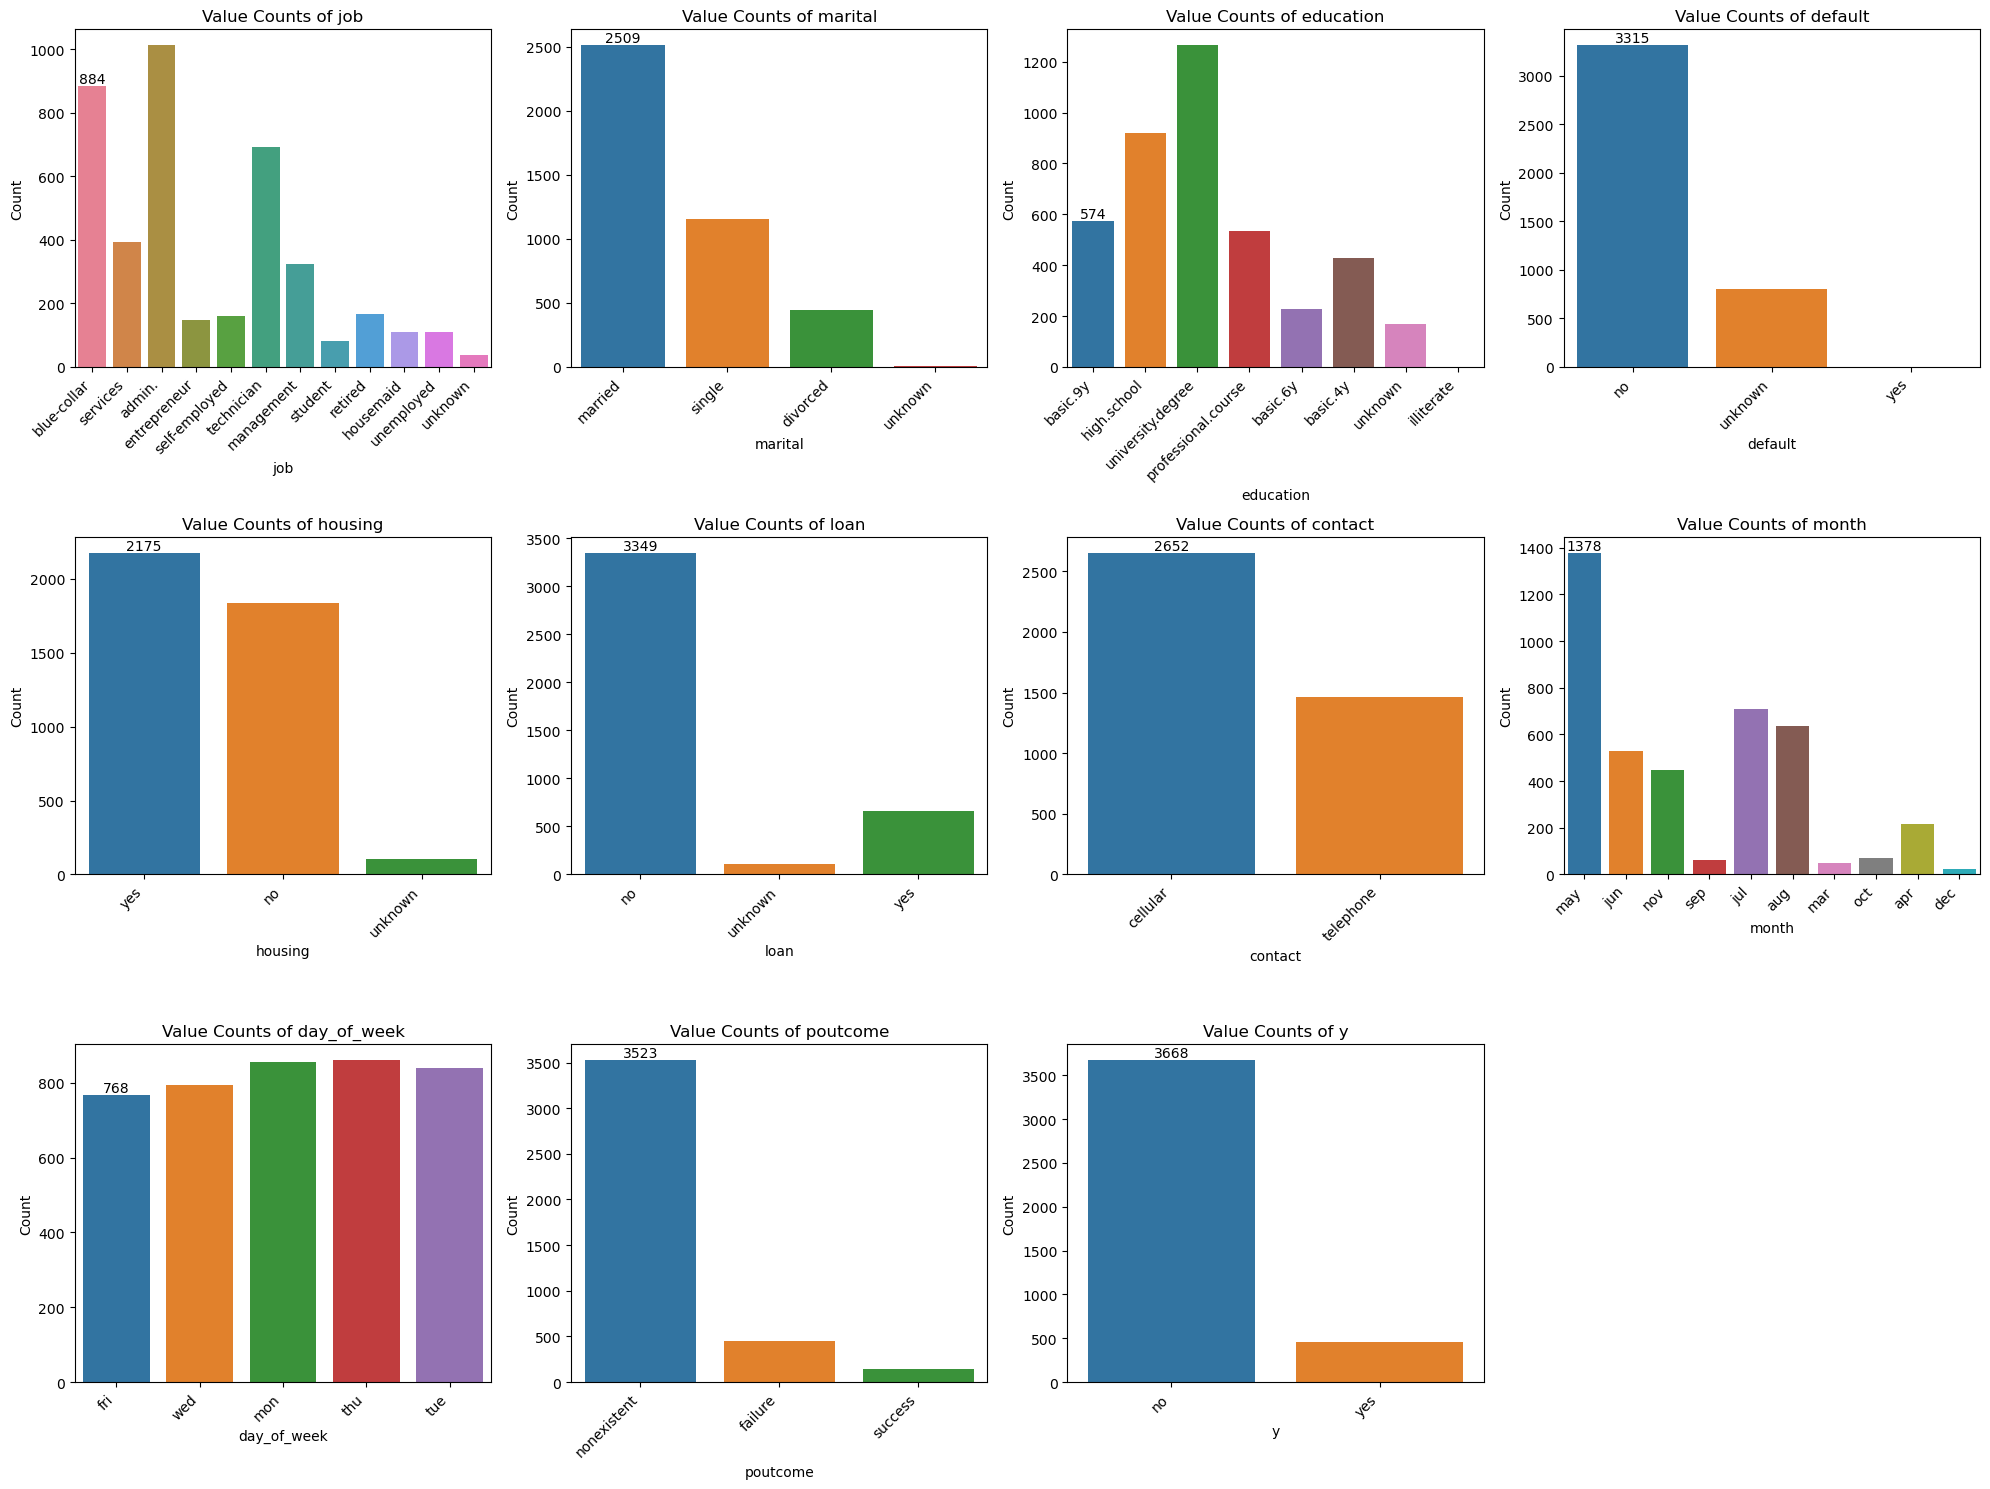

In [15]:
import seaborn as sns  # Assuming you have Seaborn installed
import matplotlib.pyplot as plt  # Import for plot display

# Assuming you have your DataFrame 'bank_additional' and the list 'categorical_columns'

# Create a figure and axes (consider upgrading Seaborn if possible)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Function to count occurrences and format as strings (optional, adjust formatting)
def count_formatter(counts):
    return [f"{int(count)}" for count in counts]  # Converts counts to integers and formats as strings

# Plot each categorical column's value counts as a count plot in a subplot
for ax, column in zip(axes, categorical_columns):
    sns.countplot(data=bank_additional, x=column, ax=ax, hue=column if len(bank_additional[column].unique()) > 1 else None)  # Use 'hue' if applicable
    ax.set_title(f'Value Counts of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

    # Try using 'get_heights' if your Seaborn version supports it
    try:
        bars = ax.containers[0]
        counts = bars.get_heights()
    except AttributeError:  # If 'get_heights' fails, use the alternative approach
        bar_rects = bars.patches
        counts = []
        for rect in bar_rects:
            counts.append(rect.get_height())

    # Format counts as strings (optional, adjust formatting)
    formatted_counts = count_formatter(counts)

    # Add count labels above bars
    ax.bar_label(bars, formatted_counts)

    # Rotate x-axis tick labels (optional, adjust rotation and alignment)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Hide any remaining empty subplots
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


$pie chart$

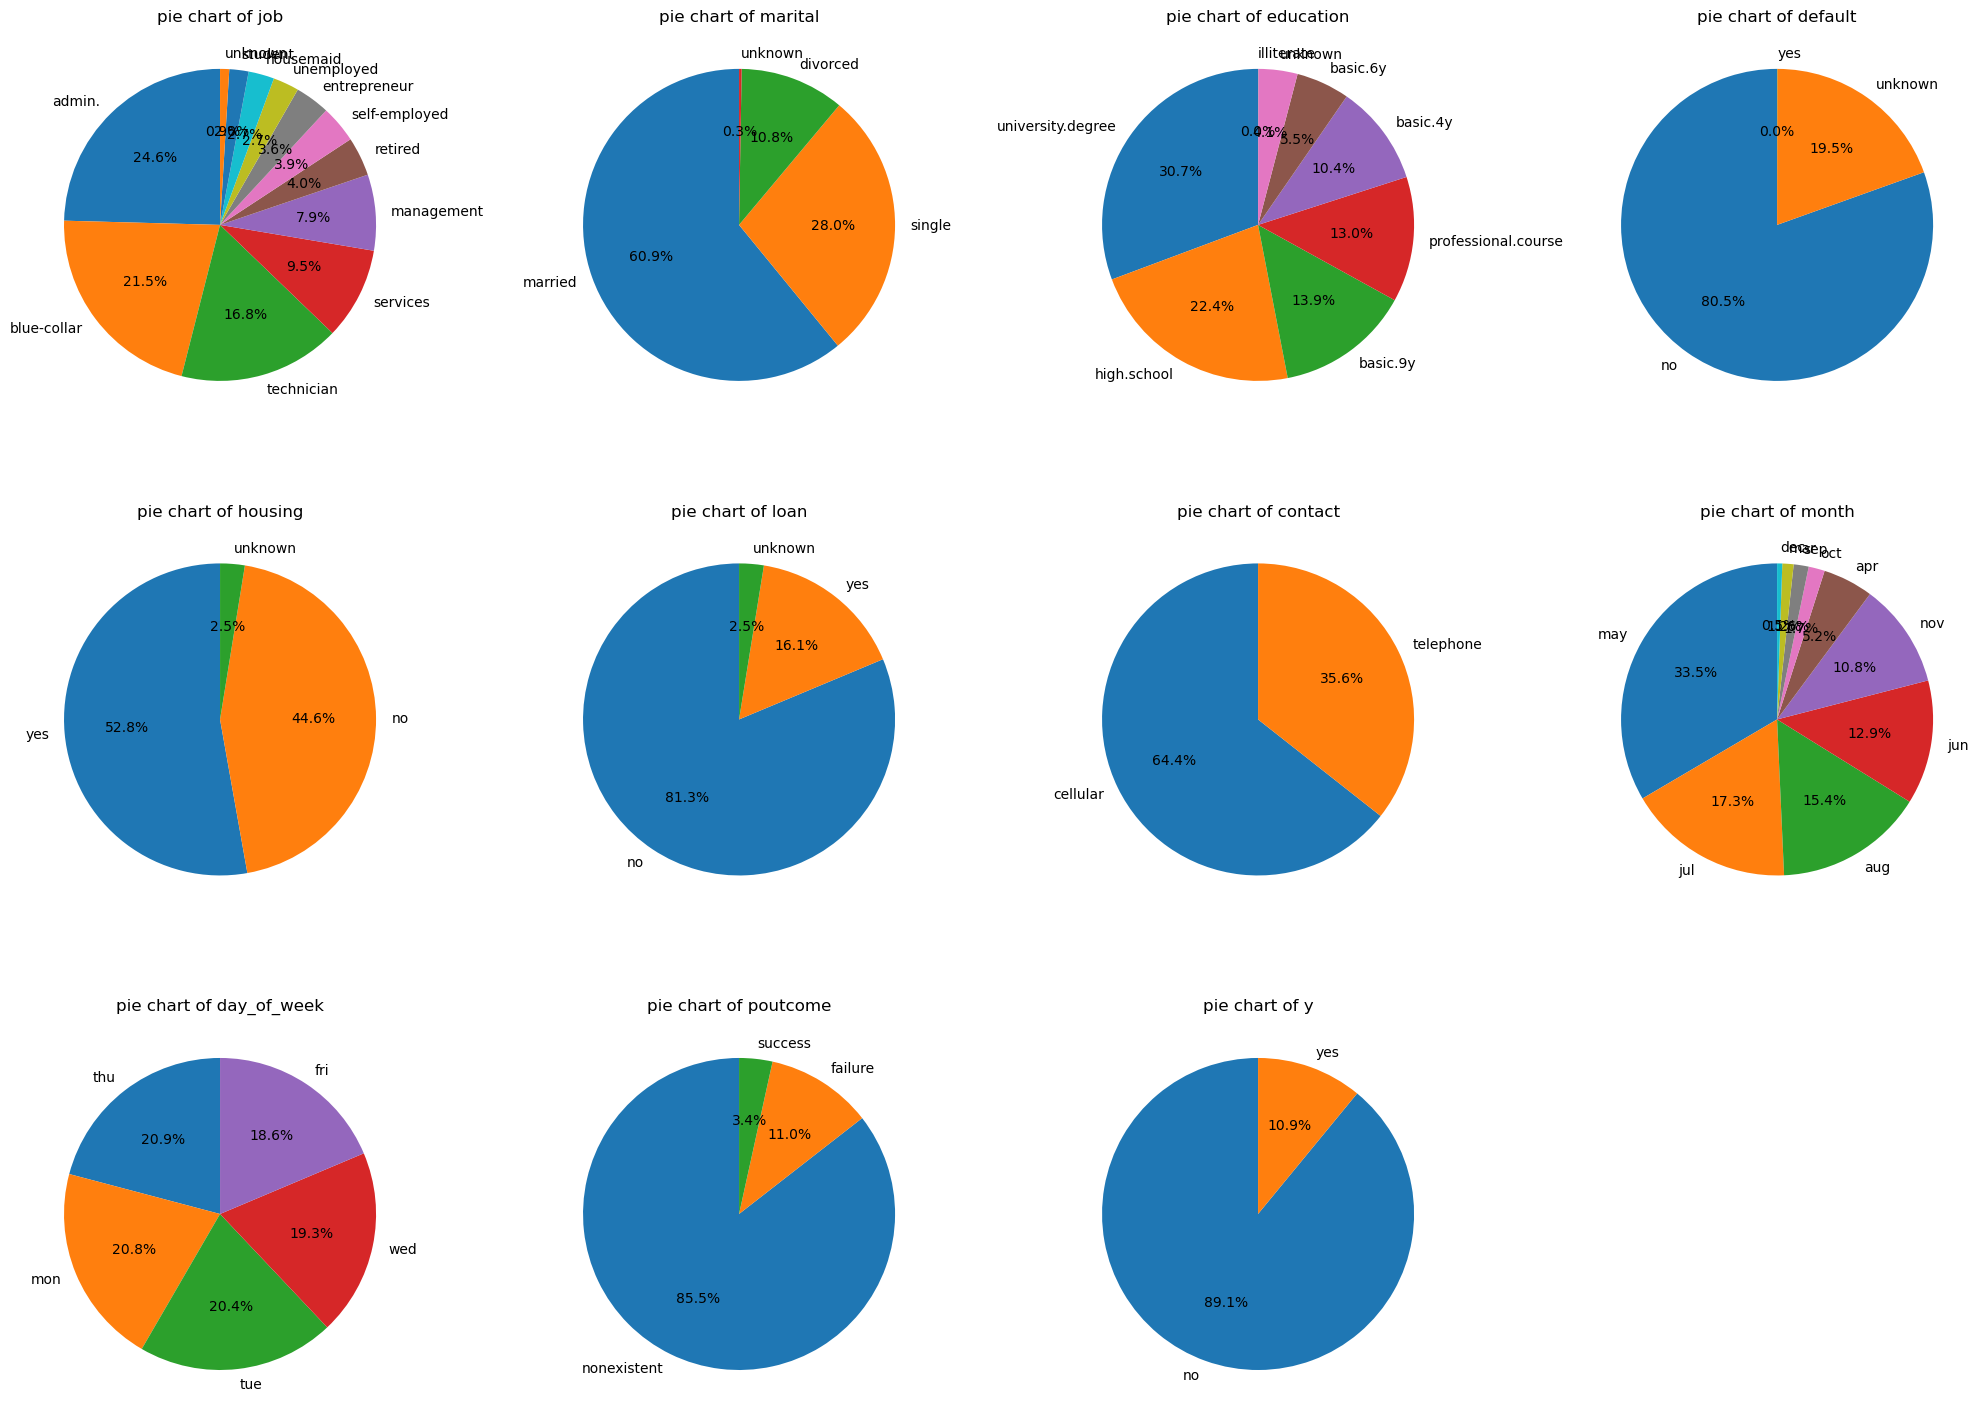

In [16]:
# Create subplots with 3 rows and 4 columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical column's value counts as a pie chart in a subplot
for ax, column in zip(axes, categorical_columns):
    value_counts = bank_additional[column].value_counts()
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'pie chart of {column}')

# Hide any remaining empty subplots
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Step-6: Numerical data analysis**

$Describe function$

In [17]:
numeric_columns = bank_additional.select_dtypes(exclude='object').columns

# Print column names with descriptive statistics
print("Descriptive Statistics for Numeric Columns:")
print("-" * 80)  # Print a separator line

# Loop through numeric columns and print descriptions
for col in numeric_columns:
    print(f"{col}:")
    print(bank_additional[col].describe())
    print("-" * 20)  # Print a small separator between columns


Descriptive Statistics for Numeric Columns:
--------------------------------------------------------------------------------
age:
count    4119.000000
mean       40.113620
std        10.313362
min        18.000000
25%        32.000000
50%        38.000000
75%        47.000000
max        88.000000
Name: age, dtype: float64
--------------------
duration:
count    4119.000000
mean      256.788055
std       254.703736
min         0.000000
25%       103.000000
50%       181.000000
75%       317.000000
max      3643.000000
Name: duration, dtype: float64
--------------------
campaign:
count    4119.000000
mean        2.537266
std         2.568159
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        35.000000
Name: campaign, dtype: float64
--------------------
pdays:
count    4119.000000
mean      960.422190
std       191.922786
min         0.000000
25%       999.000000
50%       999.000000
75%       999.000000
max       999.000000
Name: pdays, dtype: 

$Histogram$

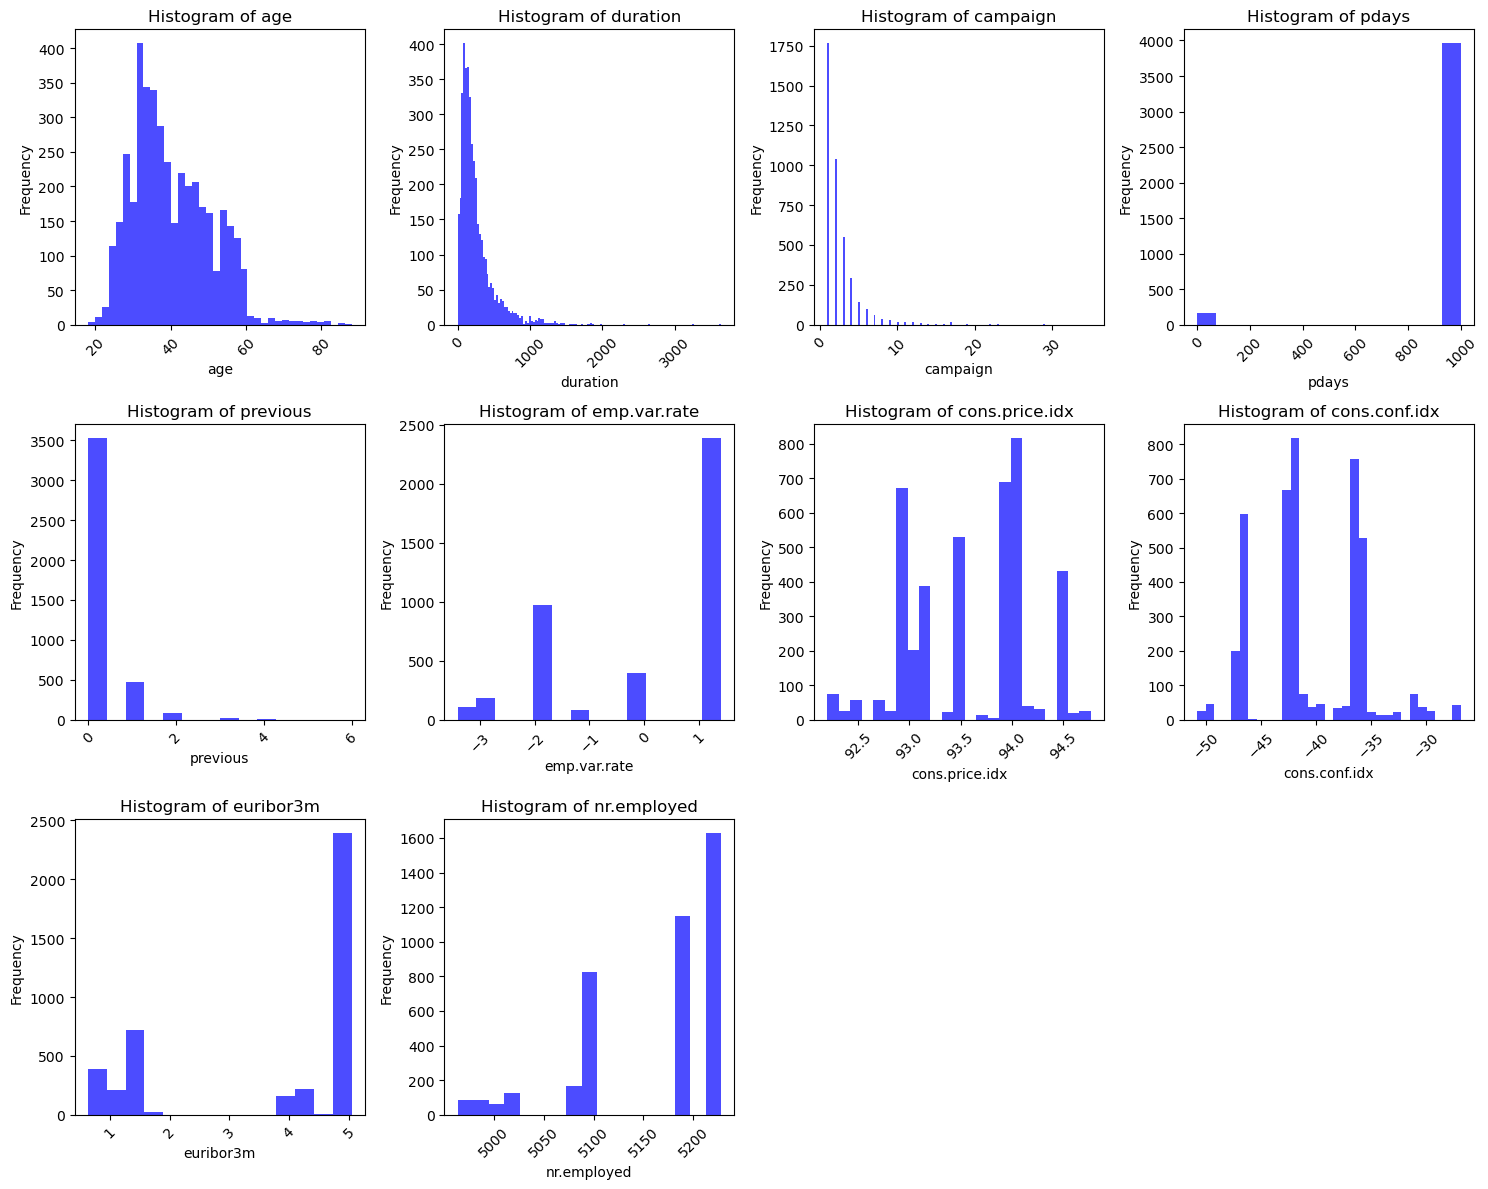

In [18]:
# Create a figure and subplots with 3 rows and 4 columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through numeric columns and plot histograms
for i, col in enumerate(numeric_columns):
    ax = axes[i]  # Get the current subplot

    # Plot histogram using matplotlib
    ax.hist(bank_additional[col], bins='auto', color='blue', alpha=0.7)
    
    # Set title and labels
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

    # Rotate x-axis tick labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Hide any remaining empty subplots
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

$Data skew ness$

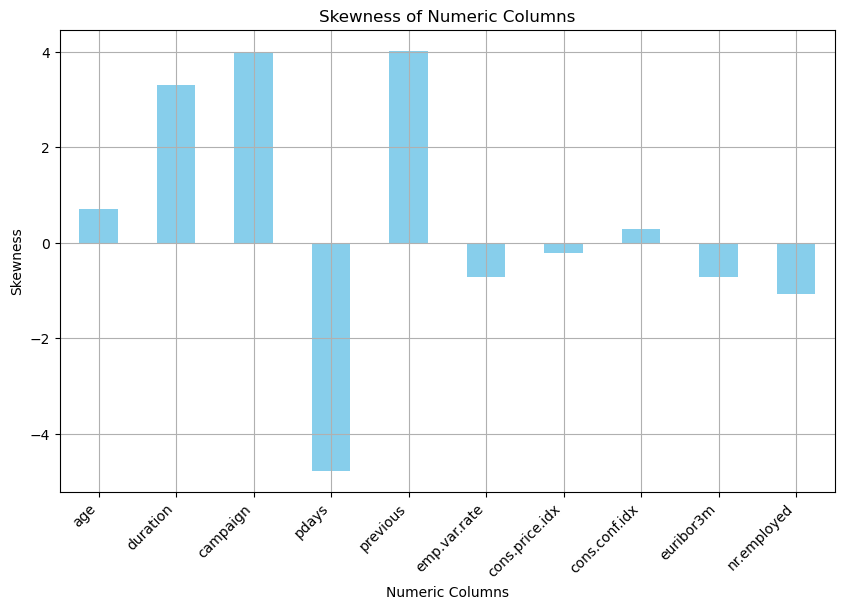

In [19]:
# Calculate skewness for each numeric column
numeric_columns = bank_additional.select_dtypes(include='number').columns
skewness_values = bank_additional[numeric_columns].skew()

# Plot skewness values as a bar chart
plt.figure(figsize=(10, 6))
skewness_values.plot(kind='bar', color='skyblue')
plt.title('Skewness of Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

**Step-7: Box plot creation
        Outlier analysis**

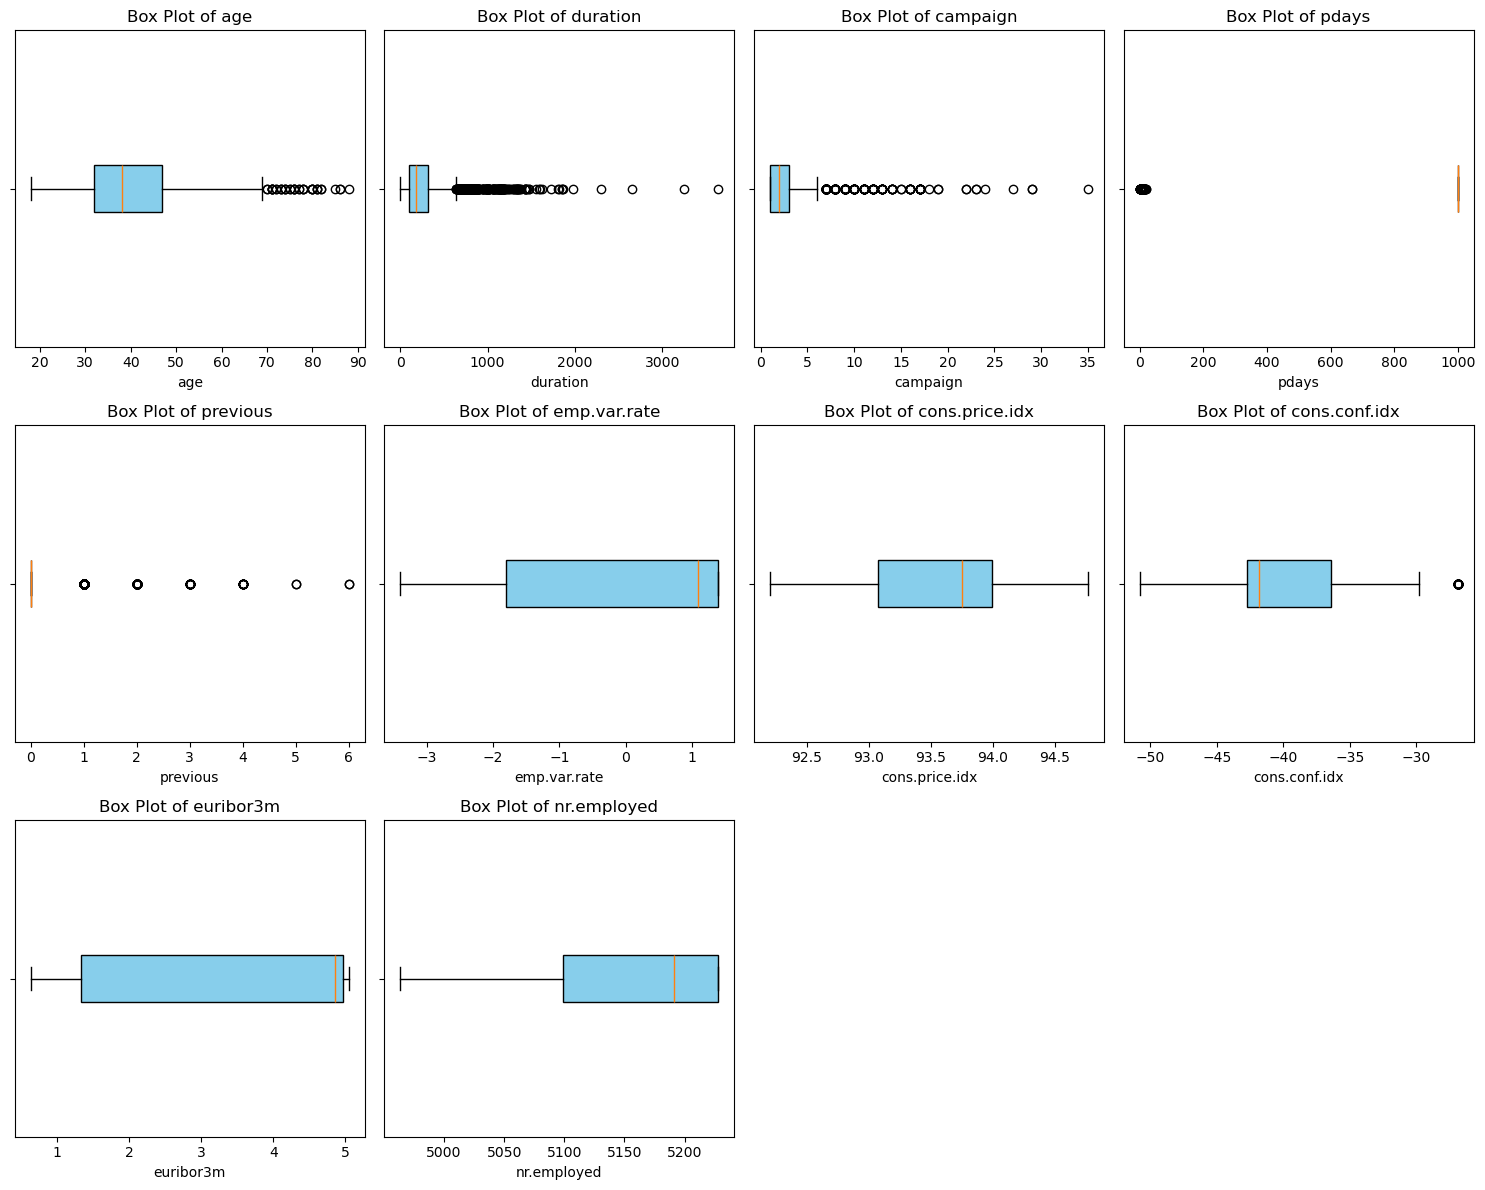

In [20]:
# Create a figure and subplots with 3 rows and 4 columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through numeric columns and plot box plots
for i, col in enumerate(numeric_columns):
    ax = axes[i]  # Get the current subplot

    # Plot box plot using matplotlib
    ax.boxplot(bank_additional[col], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    
    # Set title and labels
    ax.set_title(f"Box Plot of {col}")
    ax.set_xlabel(col)
    ax.set_yticklabels([])  # Remove y-axis labels for better readability

# Hide any remaining empty subplots
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Fill with median value**

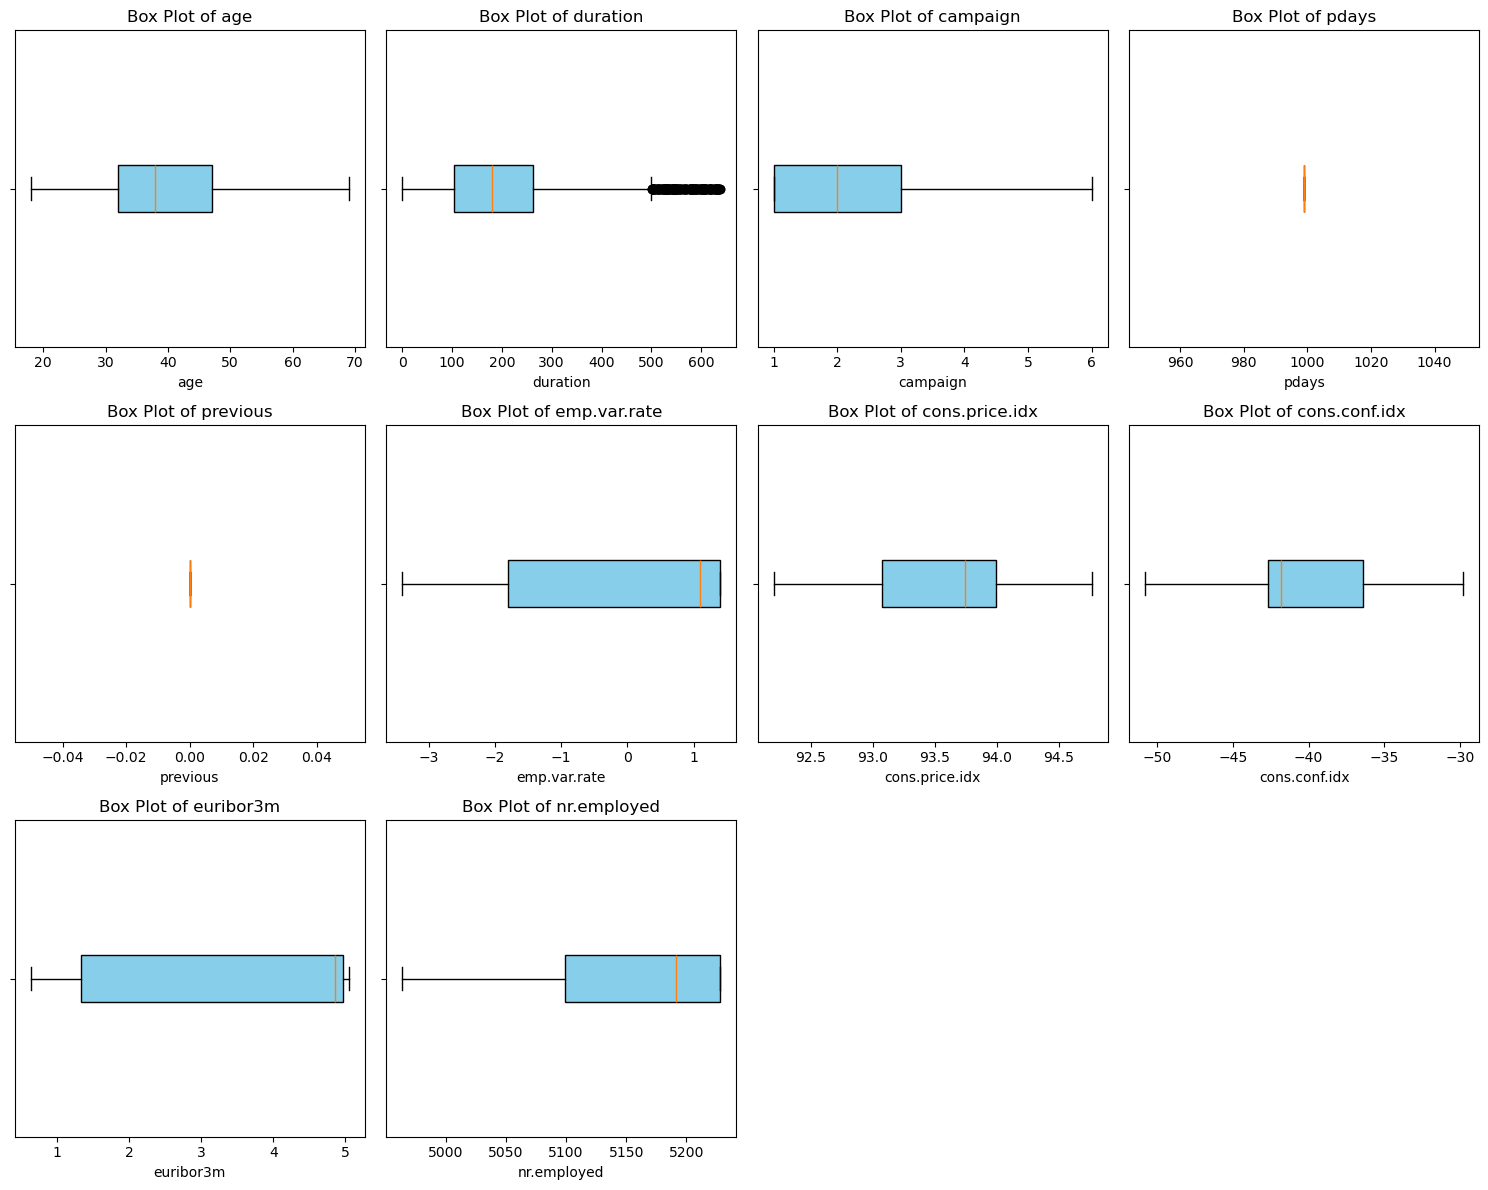

In [22]:
# Get all numeric columns
numeric_columns = bank_additional.select_dtypes(include='number').columns

# Function to replace outliers with median
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()
    
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])

# Replace outliers with median for each numeric column
for col in numeric_columns:
    replace_outliers_with_median(bank_additional, col)

# Create a figure and subplots with 3 rows and 4 columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through numeric columns and plot box plots
for i, col in enumerate(numeric_columns):
    ax = axes[i]  # Get the current subplot

    # Plot box plot using matplotlib
    ax.boxplot(bank_additional[col], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    
    # Set title and labels
    ax.set_title(f"Box Plot of {col}")
    ax.set_xlabel(col)
    ax.set_yticklabels([])  # Remove y-axis labels for better readability

# Hide any remaining empty subplots
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Cap the values with Q1 and Q3**

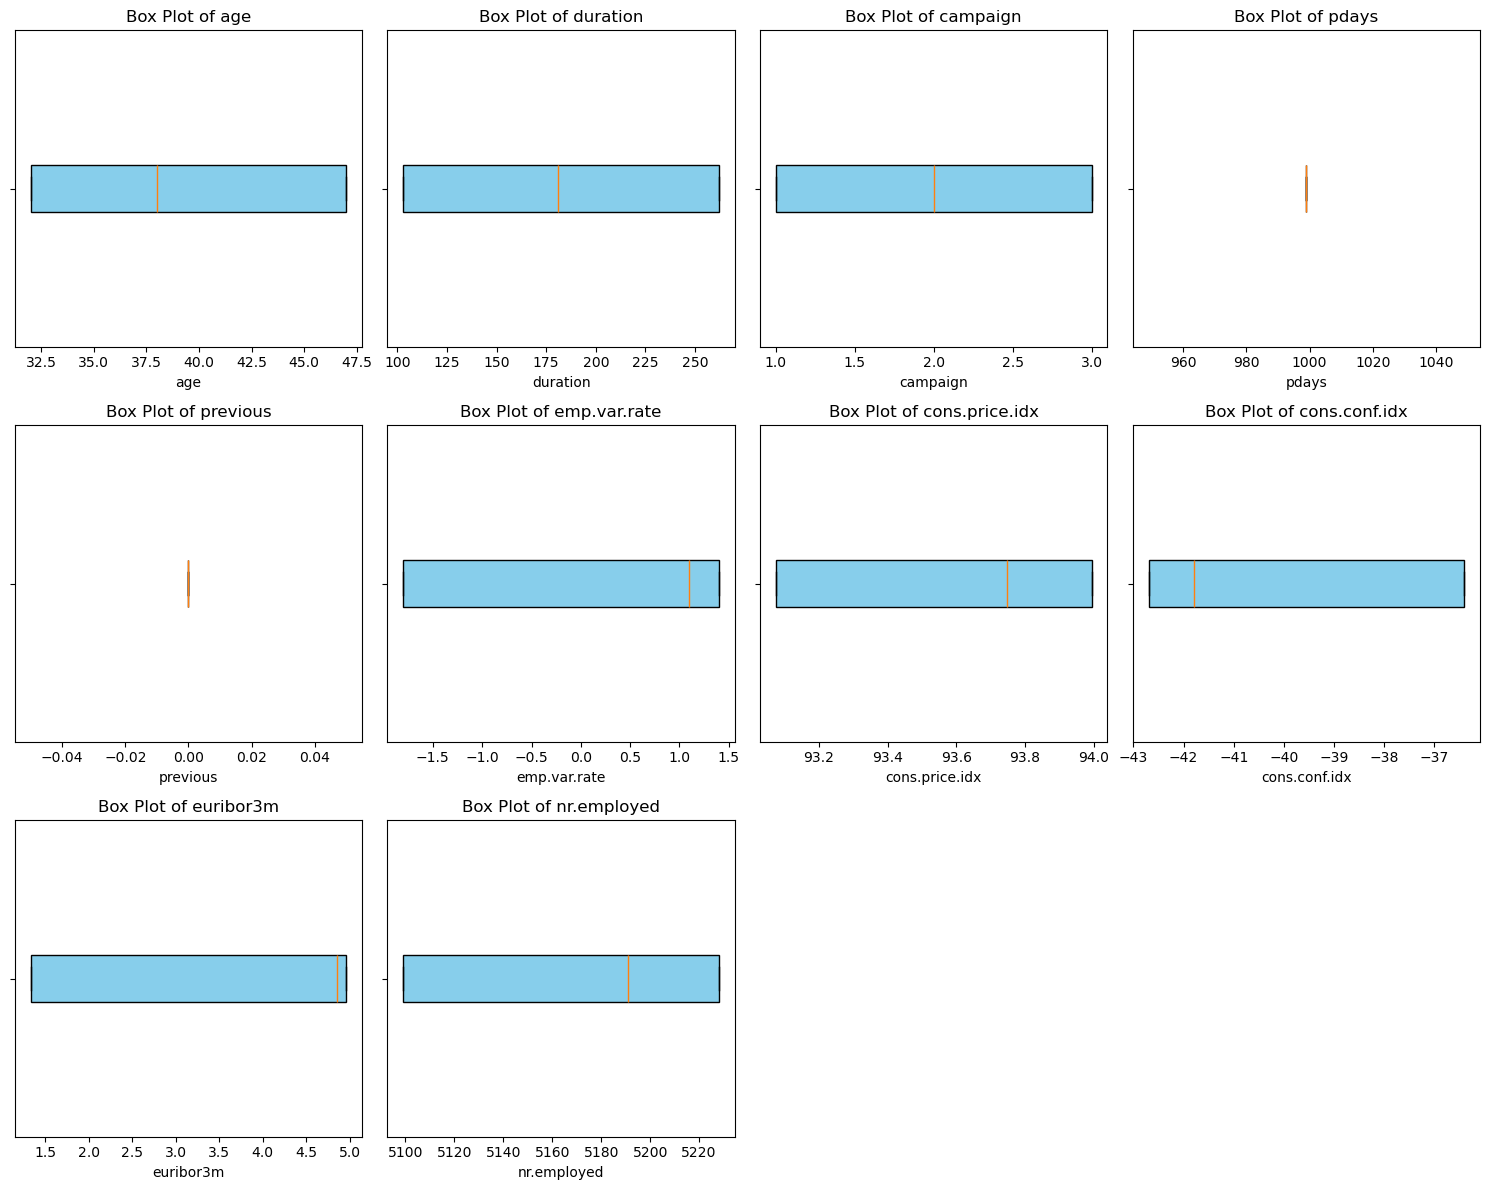

In [23]:
# Function to cap values with Q1 and Q3
def cap_values_with_quartiles(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    df[column] = np.where(df[column] < Q1, Q1, df[column])
    df[column] = np.where(df[column] > Q3, Q3, df[column])

# Cap values for each numeric column
for col in numeric_columns:
    cap_values_with_quartiles(bank_additional, col)

# Create a figure and subplots with 3 rows and 4 columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through numeric columns and plot box plots
for i, col in enumerate(numeric_columns):
    ax = axes[i]  # Get the current subplot

    # Plot box plot using matplotlib
    ax.boxplot(bank_additional[col], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    
    # Set title and labels
    ax.set_title(f"Box Plot of {col}")
    ax.set_xlabel(col)
    ax.set_yticklabels([])  # Remove y-axis labels for better readability

# Hide any remaining empty subplots
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Step-8: Transformation methods**

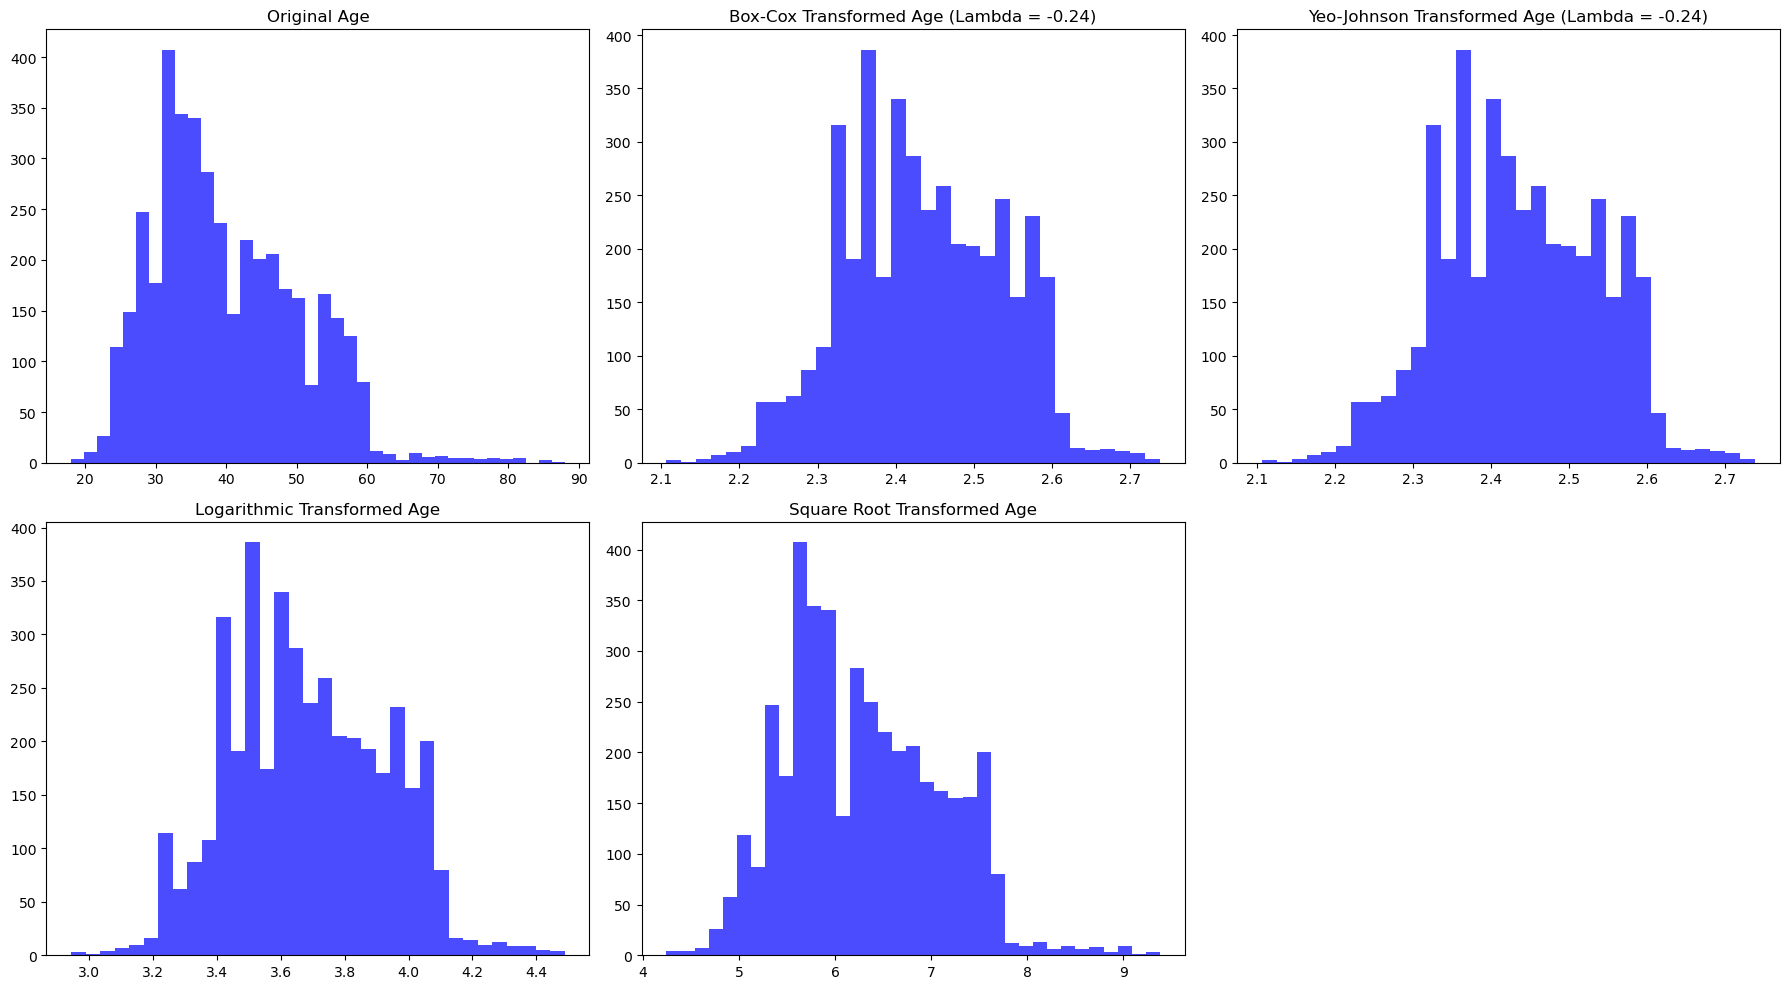

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

# Load the dataset
bank_additional = pd.read_csv(r"C:\Users\dasar\Documents\Data Science\Naresh IT\Data sets\bank-additional.csv", sep=";")

# Extract the 'age' column
age = bank_additional['age']

# 1. Box-Cox Transformation
# Box-Cox transformation requires positive data
age_boxcox_transformed, lambda_boxcox = stats.boxcox(age + 1)  # Adding 1 to handle zero values

# 2. Yeo-Johnson Transformation
age_yeojohnson_transformed, lambda_yeojohnson = stats.yeojohnson(age)

# 3. Logarithmic Transformation
age_log_transformed = np.log1p(age)  # Using log1p to handle zero values

# 4. Square Root Transformation
age_sqrt_transformed = np.sqrt(age)

# Plotting Histograms
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.hist(age, bins='auto', color='blue', alpha=0.7)
plt.title('Original Age')

plt.subplot(2, 3, 2)
plt.hist(age_boxcox_transformed, bins='auto', color='blue', alpha=0.7)
plt.title(f'Box-Cox Transformed Age (Lambda = {lambda_boxcox:.2f})')

plt.subplot(2, 3, 3)
plt.hist(age_yeojohnson_transformed, bins='auto', color='blue', alpha=0.7)
plt.title(f'Yeo-Johnson Transformed Age (Lambda = {lambda_yeojohnson:.2f})')

plt.subplot(2, 3, 4)
plt.hist(age_log_transformed, bins='auto', color='blue', alpha=0.7)
plt.title('Logarithmic Transformed Age')

plt.subplot(2, 3, 5)
plt.hist(age_sqrt_transformed, bins='auto', color='blue', alpha=0.7)
plt.title('Square Root Transformed Age')

plt.tight_layout()
plt.show()


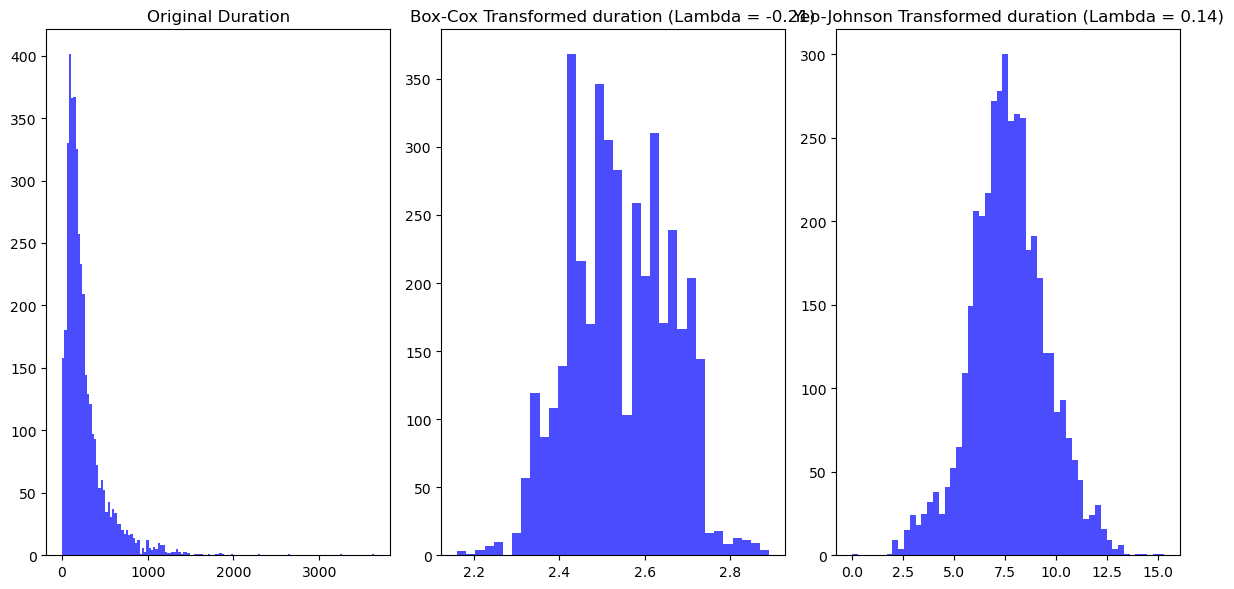

In [29]:
# Perform Box-Cox transformation
age_boxcox_transformed, lambda_boxcox = stats.boxcox(age_boxcox)

# 2. Yeo-Johnson Transformation

age_yeojohnson_transformed, lambda_yeojohnson = stats.yeojohnson(bank_additional['duration'])

# 3. Plotting Histograms

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(bank_additional['duration'], bins='auto', color='blue', alpha=0.7)
plt.title('Original Duration')

plt.subplot(1, 3, 2)
plt.hist(age_boxcox_transformed, bins='auto', color='blue', alpha=0.7)
plt.title(f'Box-Cox Transformed duration (Lambda = {lambda_boxcox:.2f})')

plt.subplot(1, 3, 3)
plt.hist(age_yeojohnson_transformed, bins='auto', color='blue', alpha=0.7)
plt.title(f'Yeo-Johnson Transformed duration (Lambda = {lambda_yeojohnson:.2f})')

plt.tight_layout()
plt.show()


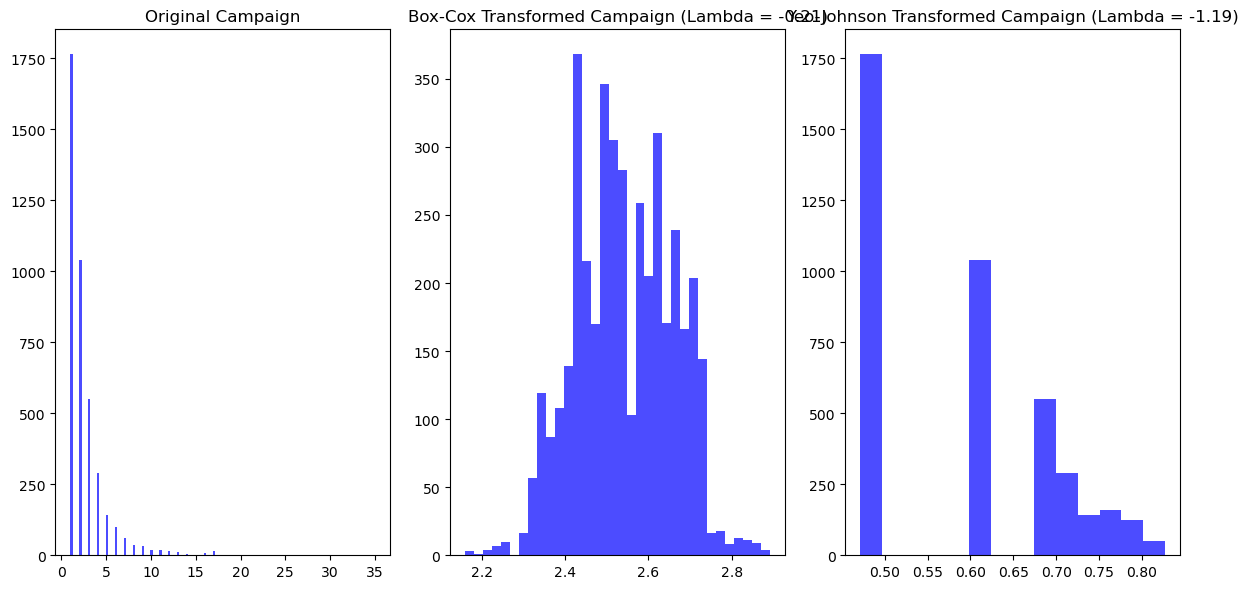

In [30]:
# Perform Box-Cox transformation
age_boxcox_transformed, lambda_boxcox = stats.boxcox(age_boxcox)

# 2. Yeo-Johnson Transformation

age_yeojohnson_transformed, lambda_yeojohnson = stats.yeojohnson(bank_additional['campaign'])

# 3. Plotting Histograms

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(bank_additional['campaign'], bins='auto', color='blue', alpha=0.7)
plt.title('Original Campaign')

plt.subplot(1, 3, 2)
plt.hist(age_boxcox_transformed, bins='auto', color='blue', alpha=0.7)
plt.title(f'Box-Cox Transformed Campaign (Lambda = {lambda_boxcox:.2f})')

plt.subplot(1, 3, 3)
plt.hist(age_yeojohnson_transformed, bins='auto', color='blue', alpha=0.7)
plt.title(f'Yeo-Johnson Transformed Campaign (Lambda = {lambda_yeojohnson:.2f})')

plt.tight_layout()
plt.show()


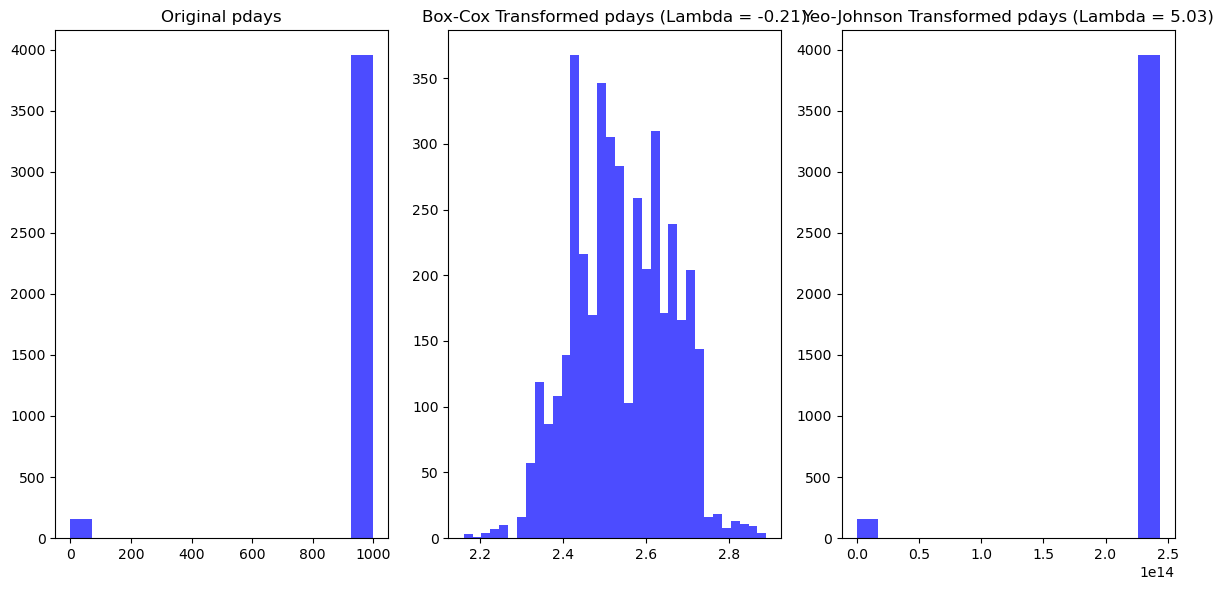

In [31]:
# Perform Box-Cox transformation
age_boxcox_transformed, lambda_boxcox = stats.boxcox(age_boxcox)

# 2. Yeo-Johnson Transformation

age_yeojohnson_transformed, lambda_yeojohnson = stats.yeojohnson(bank_additional['pdays'])

# 3. Plotting Histograms

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(bank_additional['pdays'], bins='auto', color='blue', alpha=0.7)
plt.title('Original pdays')

plt.subplot(1, 3, 2)
plt.hist(age_boxcox_transformed, bins='auto', color='blue', alpha=0.7)
plt.title(f'Box-Cox Transformed pdays (Lambda = {lambda_boxcox:.2f})')

plt.subplot(1, 3, 3)
plt.hist(age_yeojohnson_transformed, bins='auto', color='blue', alpha=0.7)
plt.title(f'Yeo-Johnson Transformed pdays (Lambda = {lambda_yeojohnson:.2f})')

plt.tight_layout()
plt.show()


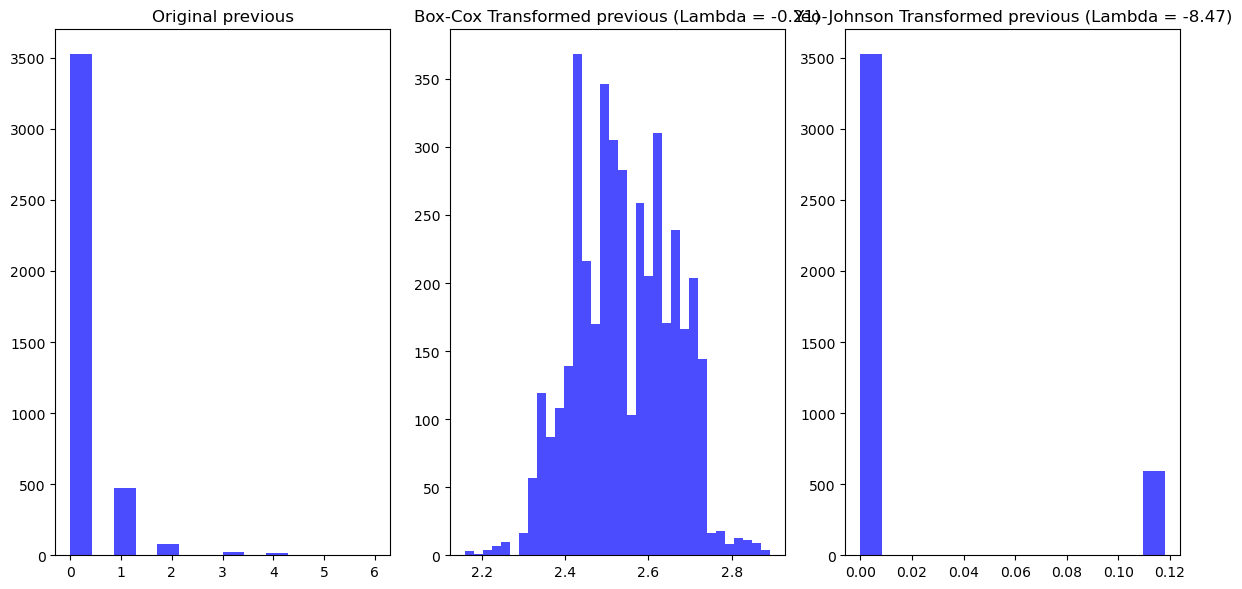

In [32]:
# Perform Box-Cox transformation
age_boxcox_transformed, lambda_boxcox = stats.boxcox(age_boxcox)

# 2. Yeo-Johnson Transformation

age_yeojohnson_transformed, lambda_yeojohnson = stats.yeojohnson(bank_additional['previous'])

# 3. Plotting Histograms

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(bank_additional['previous'], bins='auto', color='blue', alpha=0.7)
plt.title('Original previous')

plt.subplot(1, 3, 2)
plt.hist(age_boxcox_transformed, bins='auto', color='blue', alpha=0.7)
plt.title(f'Box-Cox Transformed previous (Lambda = {lambda_boxcox:.2f})')

plt.subplot(1, 3, 3)
plt.hist(age_yeojohnson_transformed, bins='auto', color='blue', alpha=0.7)
plt.title(f'Yeo-Johnson Transformed previous (Lambda = {lambda_yeojohnson:.2f})')

plt.tight_layout()
plt.show()


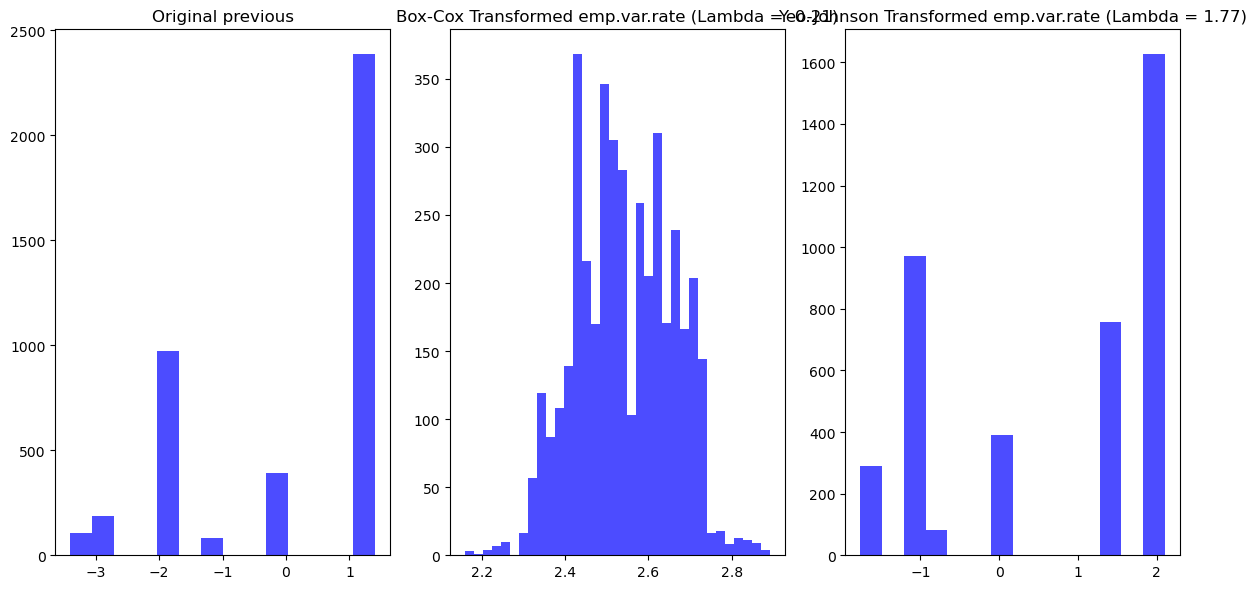

In [34]:
# Perform Box-Cox transformation
age_boxcox_transformed, lambda_boxcox = stats.boxcox(age_boxcox)

# 2. Yeo-Johnson Transformation

age_yeojohnson_transformed, lambda_yeojohnson = stats.yeojohnson(bank_additional['emp.var.rate'])

# 3. Plotting Histograms

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(bank_additional['emp.var.rate'], bins='auto', color='blue', alpha=0.7)
plt.title('Original previous')

plt.subplot(1, 3, 2)
plt.hist(age_boxcox_transformed, bins='auto', color='blue', alpha=0.7)
plt.title(f'Box-Cox Transformed emp.var.rate (Lambda = {lambda_boxcox:.2f})')

plt.subplot(1, 3, 3)
plt.hist(age_yeojohnson_transformed, bins='auto', color='blue', alpha=0.7)
plt.title(f'Yeo-Johnson Transformed emp.var.rate (Lambda = {lambda_yeojohnson:.2f})')

plt.tight_layout()
plt.show()


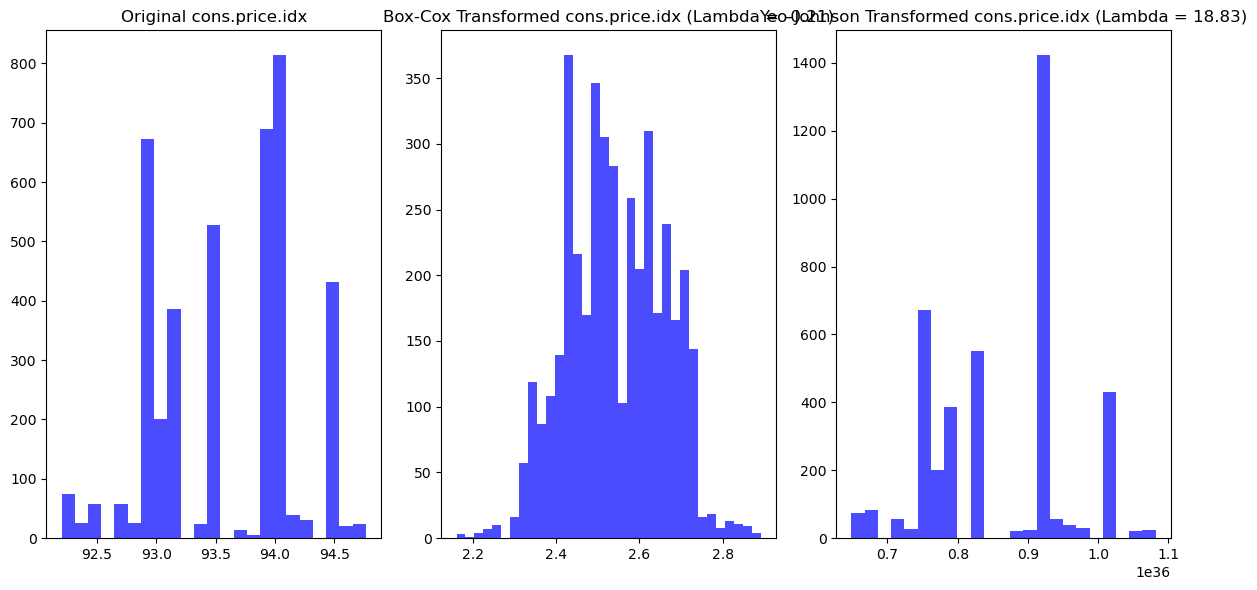

In [35]:
# Perform Box-Cox transformation
age_boxcox_transformed, lambda_boxcox = stats.boxcox(age_boxcox)

# 2. Yeo-Johnson Transformation

age_yeojohnson_transformed, lambda_yeojohnson = stats.yeojohnson(bank_additional['cons.price.idx'])

# 3. Plotting Histograms

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(bank_additional['cons.price.idx'], bins='auto', color='blue', alpha=0.7)
plt.title('Original cons.price.idx')

plt.subplot(1, 3, 2)
plt.hist(age_boxcox_transformed, bins='auto', color='blue', alpha=0.7)
plt.title(f'Box-Cox Transformed cons.price.idx (Lambda = {lambda_boxcox:.2f})')

plt.subplot(1, 3, 3)
plt.hist(age_yeojohnson_transformed, bins='auto', color='blue', alpha=0.7)
plt.title(f'Yeo-Johnson Transformed cons.price.idx (Lambda = {lambda_yeojohnson:.2f})')

plt.tight_layout()
plt.show()


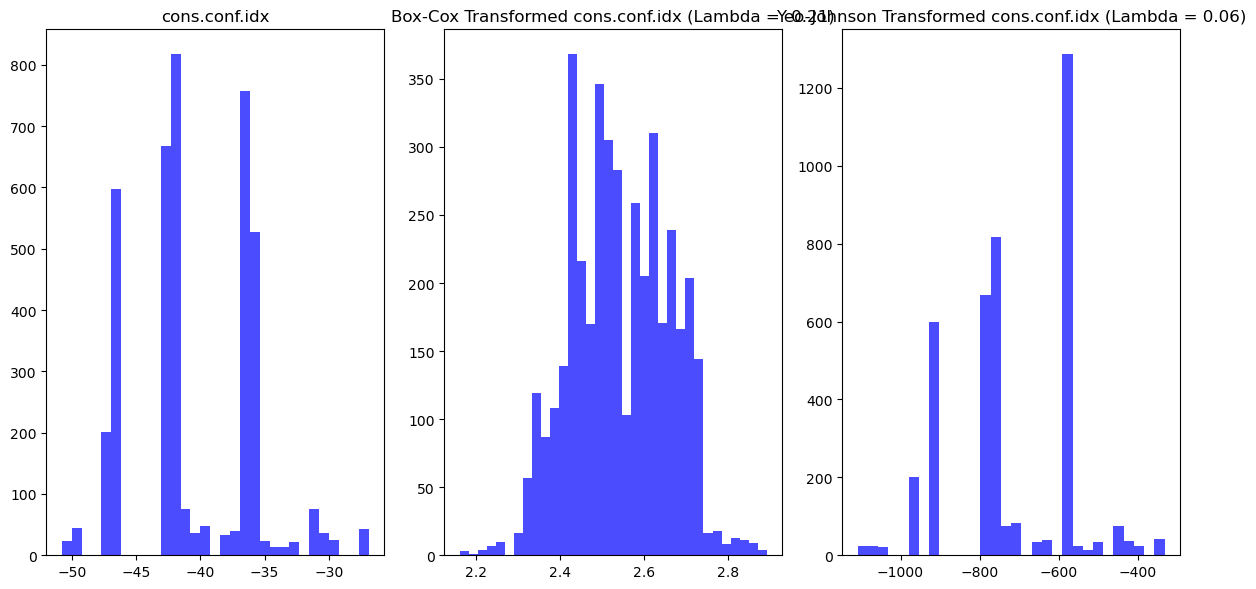

In [36]:
# Perform Box-Cox transformation
age_boxcox_transformed, lambda_boxcox = stats.boxcox(age_boxcox)

# 2. Yeo-Johnson Transformation

age_yeojohnson_transformed, lambda_yeojohnson = stats.yeojohnson(bank_additional['cons.conf.idx'])

# 3. Plotting Histograms

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(bank_additional['cons.conf.idx'], bins='auto', color='blue', alpha=0.7)
plt.title('cons.conf.idx')

plt.subplot(1, 3, 2)
plt.hist(age_boxcox_transformed, bins='auto', color='blue', alpha=0.7)
plt.title(f'Box-Cox Transformed cons.conf.idx (Lambda = {lambda_boxcox:.2f})')

plt.subplot(1, 3, 3)
plt.hist(age_yeojohnson_transformed, bins='auto', color='blue', alpha=0.7)
plt.title(f'Yeo-Johnson Transformed cons.conf.idx (Lambda = {lambda_yeojohnson:.2f})')

plt.tight_layout()
plt.show()


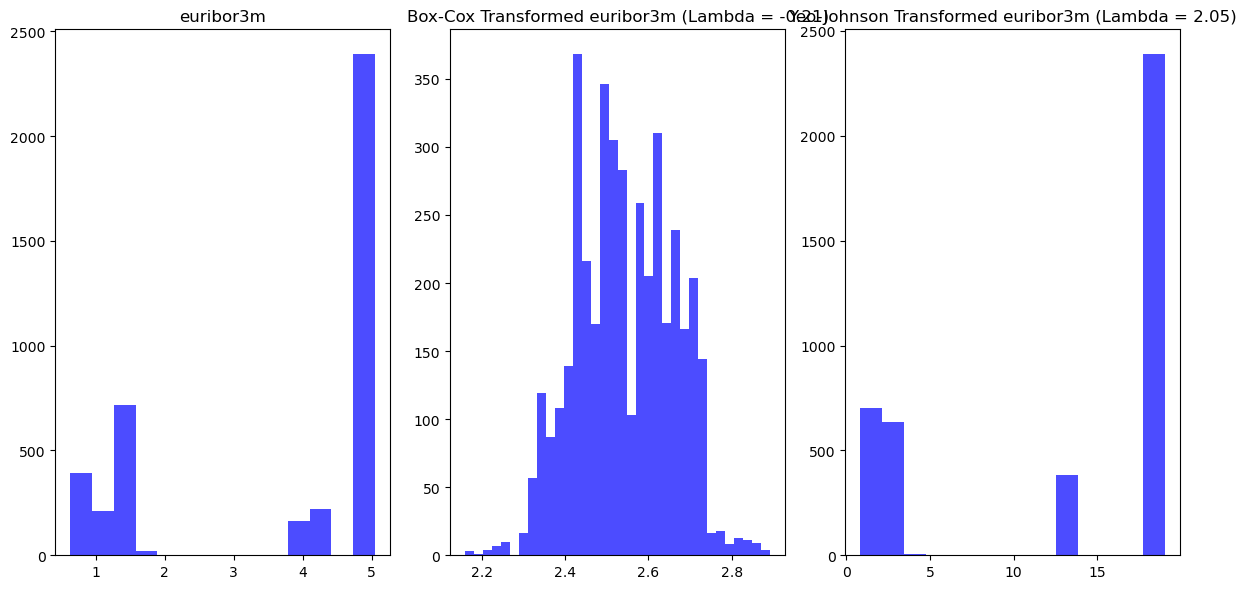

In [37]:
# Perform Box-Cox transformation
age_boxcox_transformed, lambda_boxcox = stats.boxcox(age_boxcox)

# 2. Yeo-Johnson Transformation

age_yeojohnson_transformed, lambda_yeojohnson = stats.yeojohnson(bank_additional['euribor3m'])

# 3. Plotting Histograms

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(bank_additional['euribor3m'], bins='auto', color='blue', alpha=0.7)
plt.title('euribor3m')

plt.subplot(1, 3, 2)
plt.hist(age_boxcox_transformed, bins='auto', color='blue', alpha=0.7)
plt.title(f'Box-Cox Transformed euribor3m (Lambda = {lambda_boxcox:.2f})')

plt.subplot(1, 3, 3)
plt.hist(age_yeojohnson_transformed, bins='auto', color='blue', alpha=0.7)
plt.title(f'Yeo-Johnson Transformed euribor3m (Lambda = {lambda_yeojohnson:.2f})')

plt.tight_layout()
plt.show()


**Step-9: Encoding methods**

**Label Encoding**

In [49]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder=LabelEncoder()
label_encoded_data=bank_additional.copy()
categorical_cols=bank_additional.select_dtypes(include='object')
for column in categorical_cols:
    label_encoded_data[column]=label_encoder.fit_transform(bank_additional[column])
label_encoded_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,3,2,...,1,999,0,1,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,0,1,3,0,2,0,1,3,0,...,1,999,0,1,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,8,2,3,0,0,0,0,6,1,...,2,999,1,0,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,0,1,3,0,0,0,0,1,0,...,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1,0


**Creating Heatmap using oneHot encoding**

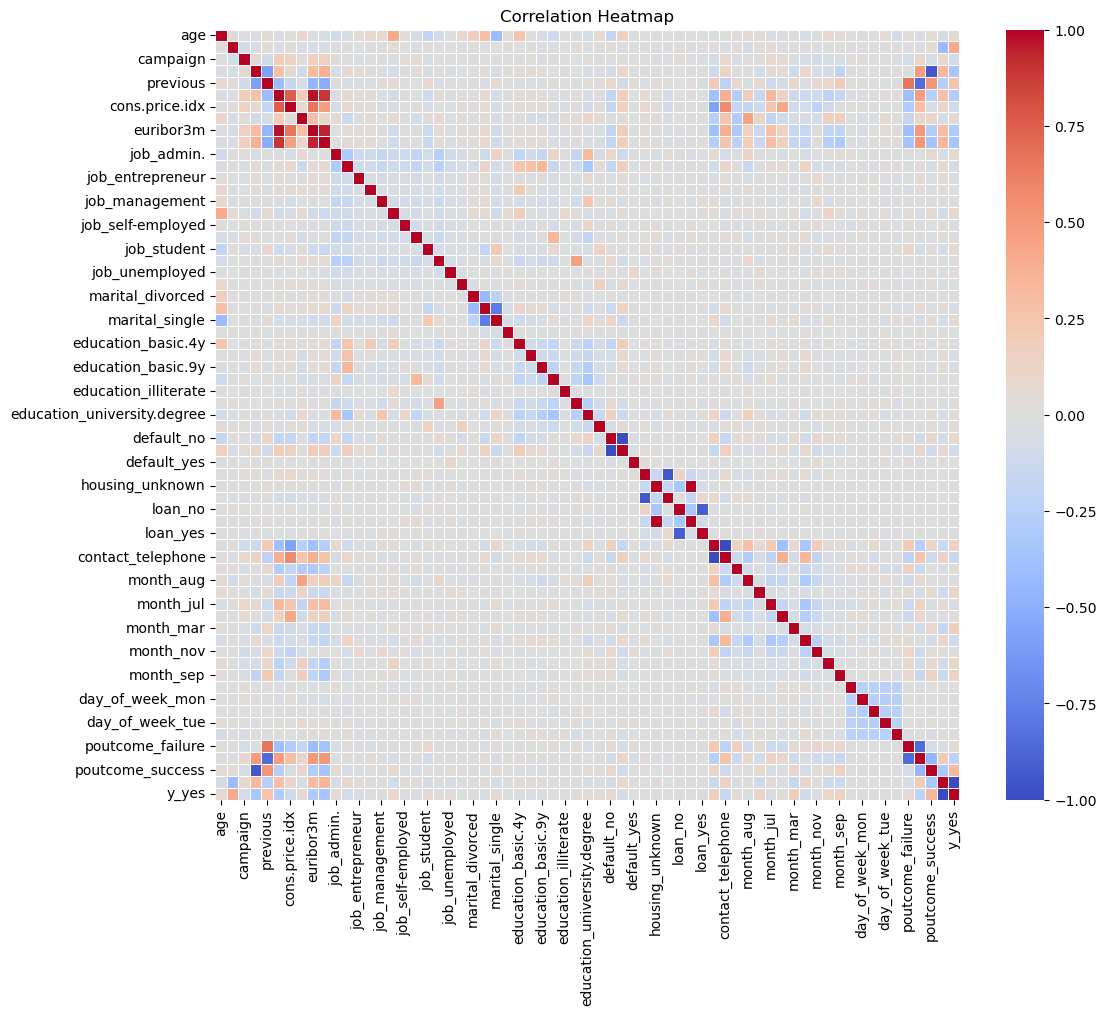

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# 1. Load the dataset
bank_additional = pd.read_csv(r"C:\Users\dasar\Documents\Data Science\Naresh IT\Data sets\bank-additional.csv", sep=";")

# 2. Select categorical columns
categorical_cols = bank_additional.select_dtypes(include=['object']).columns

# 3. Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# 4. Fit and Transform the Encoder
encoded_data = onehot_encoder.fit_transform(bank_additional[categorical_cols])

# 5. Create New DataFrame with One-Hot Encoded Features
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# 6. Concatenate Encoded Features with Original DataFrame
bank_additional = pd.concat([bank_additional, encoded_df], axis=1)

# 7. Drop Original Categorical Columns
bank_additional.drop(categorical_cols, axis=1, inplace=True)

# 8. Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(bank_additional.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
ss= StandardScaler()
ss.fit_transform(bank_additional[bank_additional.select_dtypes(exclude='object').columns])

array([[-0.98075178,  0.90395178, -0.20922829, ..., -0.18895848,
         0.35064981, -0.35064981],
       [-0.10799146,  0.35030022,  0.56963417, ..., -0.18895848,
         0.35064981, -0.35064981],
       [-1.46561862, -0.11696598, -0.59865952, ..., -0.18895848,
         0.35064981, -0.35064981],
       ...,
       [-1.27167189, -0.75700288, -0.20922829, ..., -0.18895848,
         0.35064981, -0.35064981],
       [ 1.73450254,  1.06494265, -0.59865952, ..., -0.18895848,
         0.35064981, -0.35064981],
       [-0.59285831, -0.32114953, -0.59865952, ..., -0.18895848,
         0.35064981, -0.35064981]])

**minmax scalar**

In [55]:
mm=MinMaxScaler()
mm.fit_transform(bank_additional[bank_additional.select_dtypes(exclude='object').columns])

array([[0.17142857, 0.13368103, 0.02941176, ..., 0.        , 1.        ,
        0.        ],
       [0.3       , 0.09497667, 0.08823529, ..., 0.        , 1.        ,
        0.        ],
       [0.1       , 0.06231128, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.12857143, 0.01756794, 0.02941176, ..., 0.        , 1.        ,
        0.        ],
       [0.57142857, 0.14493549, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.22857143, 0.04803733, 0.        , ..., 0.        , 1.        ,
        0.        ]])

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   30       487         2    999         0          -1.8          92.893   
1   39       346         4    999         0           1.1          93.994   
2   25       227         1    999         0           1.4          94.465   
3   38        17         3    999         0           1.4          94.465   
4   47        58         1    999         0          -0.1          93.200   

   cons.conf.idx  euribor3m  nr.employed  ...  day_of_week_fri_z  \
0          -46.2      1.313       5099.1  ...           2.088593   
1          -36.4      4.855       5191.0  ...           2.088593   
2          -41.8      4.962       5228.1  ...          -0.478675   
3          -41.8      4.959       5228.1  ...           2.088593   
4          -42.0      4.191       5195.8  ...          -0.478675   

   day_of_week_mon_z  day_of_week_thu_z  day_of_week_tue_z  day_of_week_wed_z  \
0          -0.511747          -0.513635        

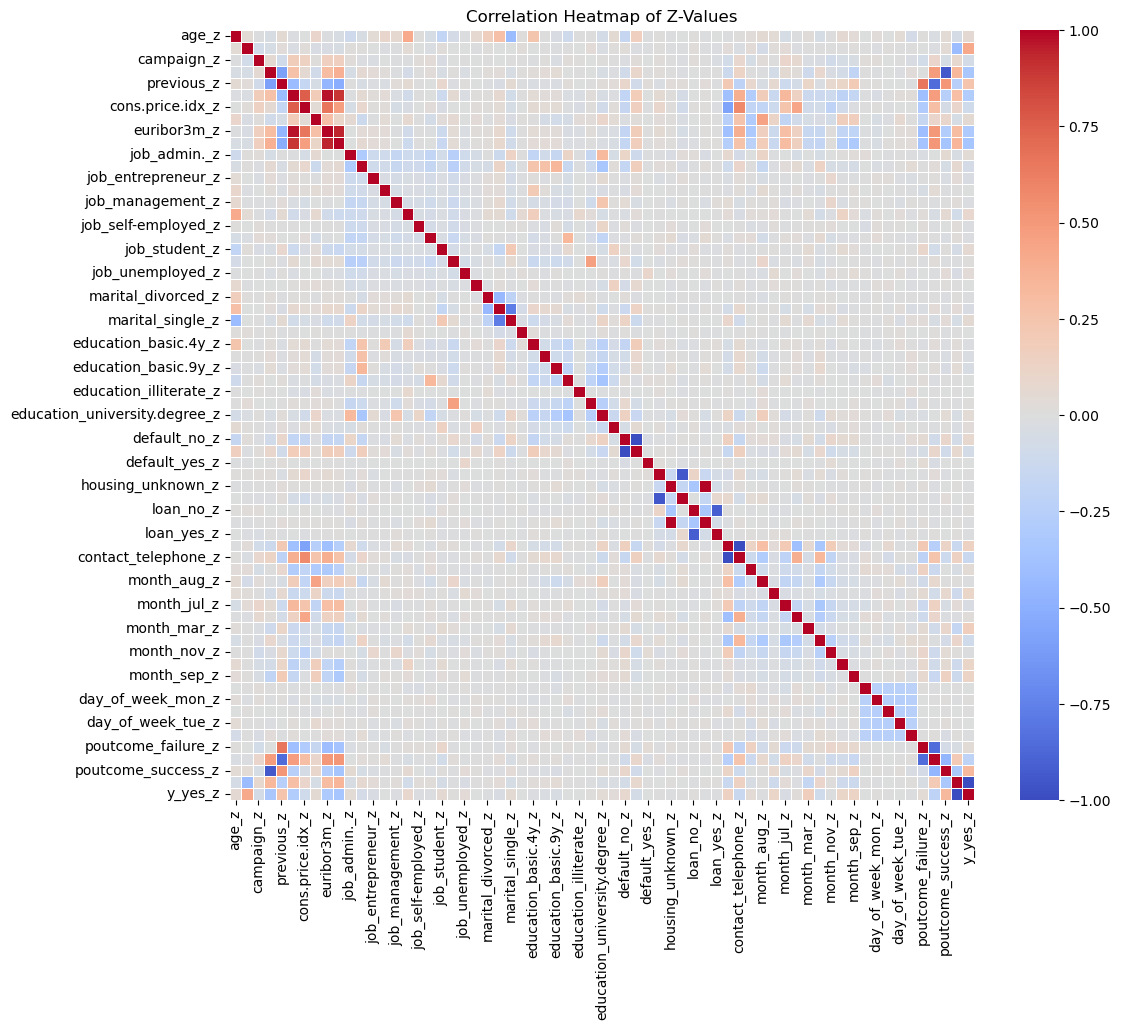

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
bank_additional = pd.read_csv(r"C:\Users\dasar\Documents\Data Science\Naresh IT\Data sets\bank-additional.csv", sep=";")

# Select categorical columns
categorical_cols = bank_additional.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and Transform the Encoder
encoded_data = onehot_encoder.fit_transform(bank_additional[categorical_cols])

# Create New DataFrame with One-Hot Encoded Features
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Concatenate Encoded Features with Original DataFrame
bank_additional = pd.concat([bank_additional, encoded_df], axis=1)

# Drop Original Categorical Columns
bank_additional.drop(categorical_cols, axis=1, inplace=True)

# Calculate z-values (standardization)
z_values = (bank_additional - bank_additional.mean()) / bank_additional.std()

# Add z-values as new columns to the DataFrame
z_columns = {col: f"{col}_z" for col in z_values.columns}
z_values = z_values.rename(columns=z_columns)
bank_additional = pd.concat([bank_additional, z_values], axis=1)

# Display the first few rows of the DataFrame to verify the z-values
print(bank_additional.head())

# Create a heatmap using seaborn to visualize correlations of the original data
plt.figure(figsize=(12, 10))
sns.heatmap(bank_additional[z_columns.values()].corr(), cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Z-Values')
plt.show()
